Single-channel CSC
==================

This example demonstrates solving a convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \; \frac{1}{2} \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{m} - \mathbf{s} \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_{m} \|_1 \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                 idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

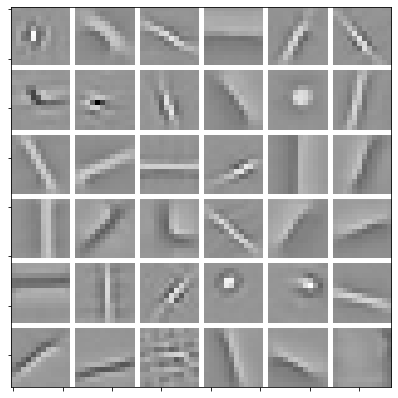

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDN) solver options.

In [5]:
lmbda = 5e-2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------


   0  7.11e+01  7.59e-01  1.41e+03  8.69e-01  2.38e-01  3.50e+00
   1  5.85e+01  3.26e+00  1.10e+03  4.94e-01  4.10e-01  3.50e+00
   2  6.01e+01  3.75e+00  1.13e+03  3.14e-01  2.78e-01  3.50e+00


   3  5.44e+01  3.86e+00  1.01e+03  2.62e-01  2.08e-01  3.13e+00
   4  4.78e+01  4.16e+00  8.74e+02  2.20e-01  1.52e-01  3.13e+00
   5  4.49e+01  4.50e+00  8.08e+02  1.77e-01  1.17e-01  3.13e+00


   6  4.24e+01  4.72e+00  7.54e+02  1.39e-01  9.87e-02  3.13e+00
   7  4.02e+01  4.82e+00  7.08e+02  1.13e-01  8.49e-02  3.13e+00
   8  3.90e+01  4.87e+00  6.82e+02  9.52e-02  7.47e-02  3.13e+00


   9  3.77e+01  4.93e+00  6.55e+02  8.20e-02  6.27e-02  3.13e+00
  10  3.59e+01  4.99e+00  6.18e+02  7.06e-02  5.54e-02  3.13e+00
  11  3.45e+01  5.07e+00  5.89e+02  6.08e-02  5.16e-02  3.13e+00


  12  3.39e+01  5.12e+00  5.75e+02  5.63e-02  4.53e-02  2.85e+00
  13  3.34e+01  5.16e+00  5.64e+02  4.99e-02  3.90e-02  2.85e+00
  14  3.27e+01  5.18e+00  5.51e+02  4.41e-02  3.55e-02  2.85e+00


  15  3.20e+01  5.21e+00  5.36e+02  3.93e-02  3.29e-02  2.85e+00
  16  3.14e+01  5.23e+00  5.24e+02  3.52e-02  2.99e-02  2.85e+00
  17  3.10e+01  5.25e+00  5.15e+02  3.33e-02  2.75e-02  2.60e+00


  18  3.06e+01  5.27e+00  5.07e+02  3.03e-02  2.53e-02  2.60e+00
  19  3.04e+01  5.28e+00  5.02e+02  2.78e-02  2.31e-02  2.60e+00
  20  3.01e+01  5.30e+00  4.95e+02  2.55e-02  2.11e-02  2.60e+00


  21  2.97e+01  5.31e+00  4.88e+02  2.35e-02  1.98e-02  2.60e+00
  22  2.93e+01  5.32e+00  4.80e+02  2.16e-02  1.89e-02  2.60e+00


  23  2.91e+01  5.33e+00  4.76e+02  2.12e-02  1.78e-02  2.33e+00
  24  2.90e+01  5.33e+00  4.73e+02  1.99e-02  1.63e-02  2.33e+00


  25  2.88e+01  5.34e+00  4.70e+02  1.86e-02  1.52e-02  2.33e+00
  26  2.86e+01  5.34e+00  4.66e+02  1.74e-02  1.43e-02  2.33e+00
  27  2.84e+01  5.35e+00  4.61e+02  1.64e-02  1.34e-02  2.33e+00


  28  2.82e+01  5.36e+00  4.57e+02  1.54e-02  1.27e-02  2.33e+00
  29  2.80e+01  5.38e+00  4.53e+02  1.44e-02  1.21e-02  2.33e+00
  30  2.79e+01  5.39e+00  4.49e+02  1.35e-02  1.15e-02  2.33e+00


  31  2.78e+01  5.39e+00  4.48e+02  1.35e-02  1.09e-02  2.12e+00
  32  2.77e+01  5.40e+00  4.47e+02  1.28e-02  1.02e-02  2.12e+00
  33  2.77e+01  5.40e+00  4.45e+02  1.22e-02  9.69e-03  2.12e+00


  34  2.75e+01  5.40e+00  4.43e+02  1.15e-02  9.29e-03  2.12e+00
  35  2.74e+01  5.40e+00  4.40e+02  1.10e-02  8.91e-03  2.12e+00
  36  2.73e+01  5.41e+00  4.37e+02  1.04e-02  8.51e-03  2.12e+00


  37  2.72e+01  5.41e+00  4.35e+02  9.93e-03  8.12e-03  2.12e+00
  38  2.71e+01  5.42e+00  4.33e+02  9.47e-03  7.75e-03  2.12e+00
  39  2.70e+01  5.43e+00  4.31e+02  9.02e-03  7.40e-03  2.12e+00


  40  2.69e+01  5.43e+00  4.30e+02  8.60e-03  7.07e-03  2.12e+00
  41  2.69e+01  5.43e+00  4.29e+02  8.21e-03  6.80e-03  2.12e+00
  42  2.68e+01  5.44e+00  4.27e+02  7.83e-03  6.56e-03  2.12e+00


  43  2.67e+01  5.44e+00  4.26e+02  7.50e-03  6.30e-03  2.12e+00
  44  2.67e+01  5.44e+00  4.24e+02  7.18e-03  6.02e-03  2.12e+00
  45  2.66e+01  5.44e+00  4.23e+02  6.88e-03  5.77e-03  2.12e+00


  46  2.65e+01  5.45e+00  4.22e+02  6.59e-03  5.57e-03  2.12e+00
  47  2.65e+01  5.45e+00  4.20e+02  6.32e-03  5.39e-03  2.12e+00


  48  2.64e+01  5.45e+00  4.19e+02  6.37e-03  5.20e-03  1.93e+00
  49  2.64e+01  5.45e+00  4.18e+02  6.15e-03  5.00e-03  1.93e+00
  50  2.63e+01  5.46e+00  4.17e+02  5.94e-03  4.78e-03  1.93e+00


  51  2.63e+01  5.46e+00  4.17e+02  5.73e-03  4.58e-03  1.93e+00
  52  2.63e+01  5.46e+00  4.16e+02  5.52e-03  4.40e-03  1.93e+00
  53  2.62e+01  5.47e+00  4.15e+02  5.31e-03  4.25e-03  1.93e+00


  54  2.62e+01  5.47e+00  4.14e+02  5.11e-03  4.10e-03  1.93e+00
  55  2.62e+01  5.47e+00  4.14e+02  4.92e-03  3.97e-03  1.93e+00
----------------------------------------------------------------
ConvBPDN solve time: 7.68s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 37.21dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

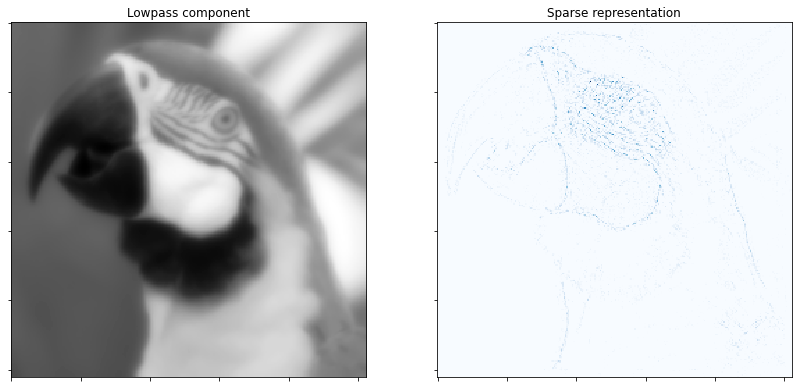

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

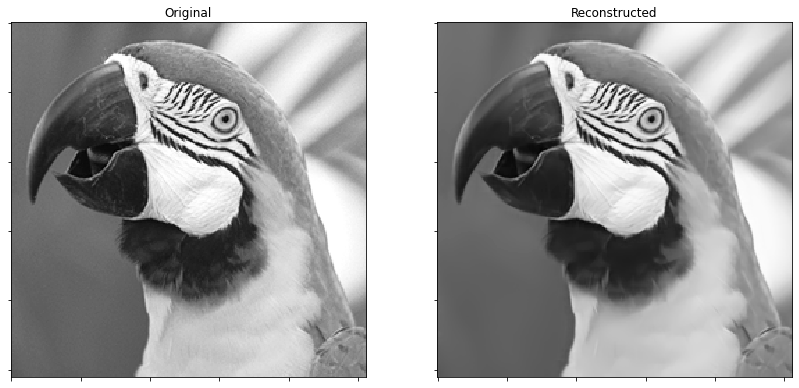

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

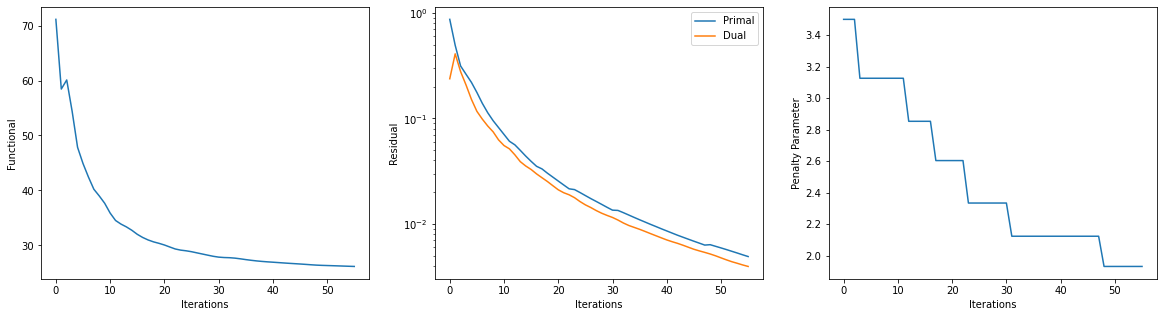

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()